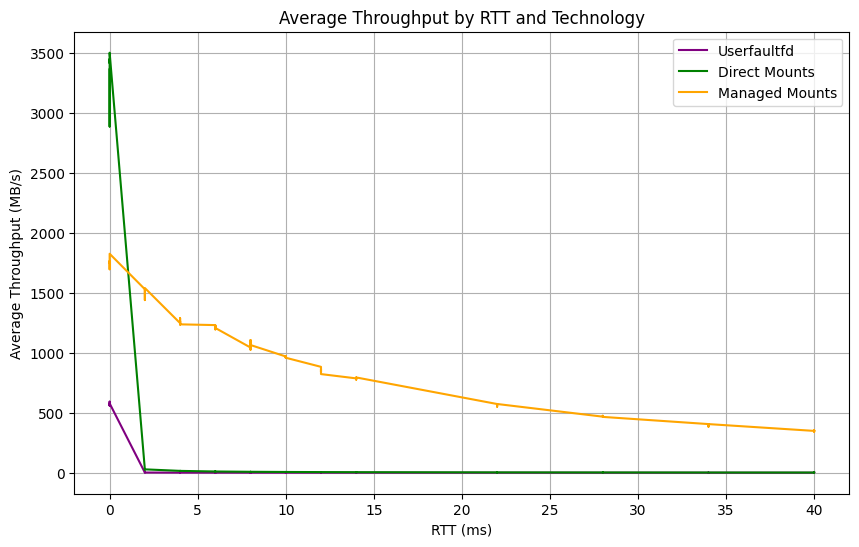

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../bench/throughput-rttvar/results.csv')

# Fill NaN values in 'RTT (ms)' column with forward fill method
data['RTT (ms)'].fillna(method='ffill', inplace=True)

# Convert 'RTT (ms)' to numerical by removing 'ms' and converting to int
data['RTT (ms)'] = data['RTT (ms)'].str.replace('ms', '').astype(int)

# Set 'RTT (ms)' as index
data.set_index('RTT (ms)', inplace=True)

# Plot with a different color scheme and the legend in the top right
plt.figure(figsize=(10,6))
plt.plot(data['Throughput for userfaultfd (MB/s)'], label='Userfaultfd', color='purple')
plt.plot(data['Throughput for Direct Mounts (MB/s)'], label='Direct Mounts', color='green')
plt.plot(data['Throughput for Managed Mounts (MB/s)'], label='Managed Mounts', color='orange')
plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')
plt.title('Average Throughput by RTT and Technology')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()